# Proyecto de Preprocesamiento de Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer


## Paso 1 - Lectura de los datos:


In [2]:
df = pd.read_csv ('/workspaces/machine-learning-python-template-clara/data/raw/AB_NYC_2019.csv').iloc[:,1:]

pd.set_option('display.max_columns', None)

df.head()



,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.shape

(48895, 15)

## Paso 2 - Análisis de Constantes

In [4]:
n_unicos = df.nunique()
n_unicos

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [29]:
# Revisamos que no tengamos anuncios duplicados
duplicated = df.duplicated().sum()
print(duplicated)

0


In [6]:
# Descripción básica de las columnas numéricas
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,48879,47905,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48895.0,NaN,NaN,NaN,67620010.64661,78610967.032667,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
host_name,48874,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895.0,NaN,NaN,NaN,40.728949,0.05453,40.49979,40.6901,40.72307,40.763115,40.91306
longitude,48895.0,NaN,NaN,NaN,-73.95217,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895.0,NaN,NaN,NaN,152.720687,240.15417,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,NaN,NaN,NaN,7.029962,20.51055,1.0,1.0,3.0,5.0,1250.0


en la tabla se ve que en los precios hay un minimo de 0€ lo cual no tiene sentido por lo que hacemos un filtrado

In [16]:
df = df[df['price'] > 0]

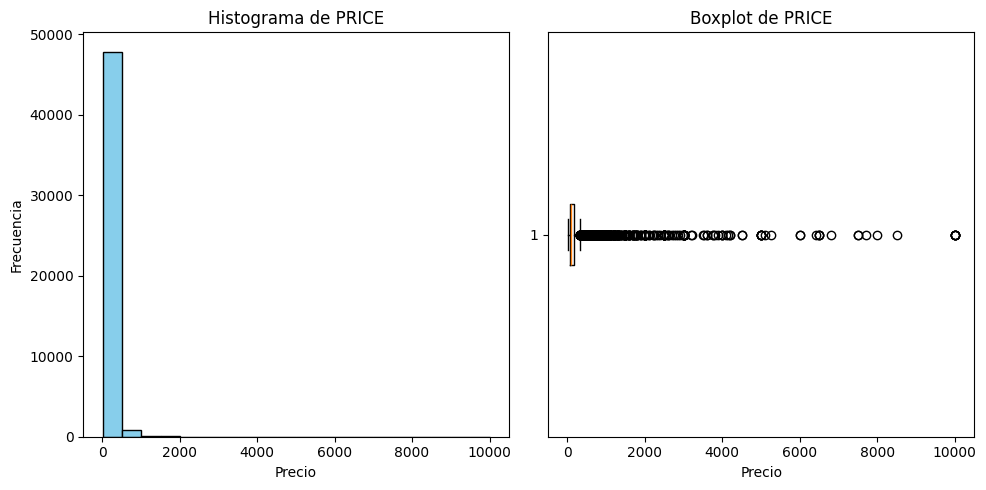

In [17]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [18]:
# Transformamos la variable respuesta/dependiente/y/target a escala logarítmica
df['log_price'] = np.log(df['price'])



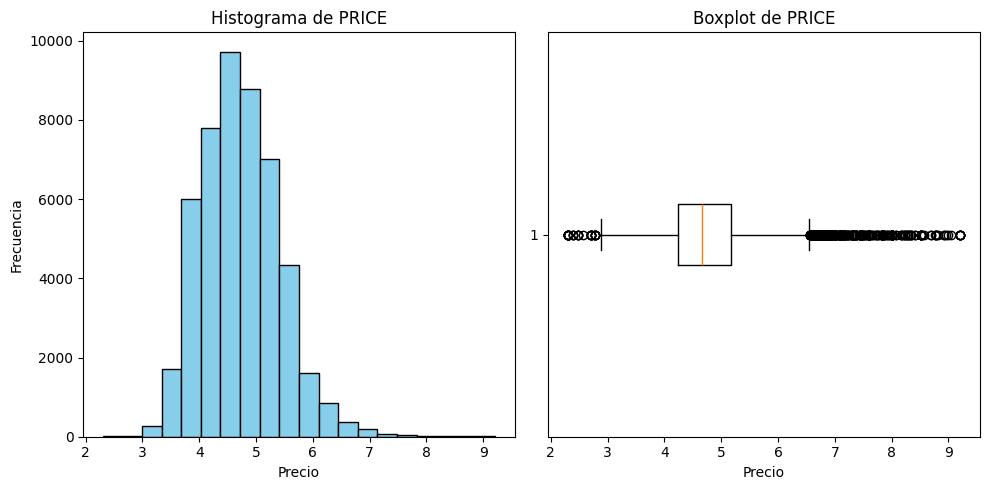

In [19]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['log_price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['log_price'], vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [20]:
# Revisamos los valores faltantes
df.isnull().mean()*100

name                               0.032731
host_id                            0.000000
host_name                          0.042959
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.560920
reviews_per_month                 20.560920
calculated_host_listings_count     0.000000
availability_365                   0.000000
log_price                          0.000000
dtype: float64

<Axes: >

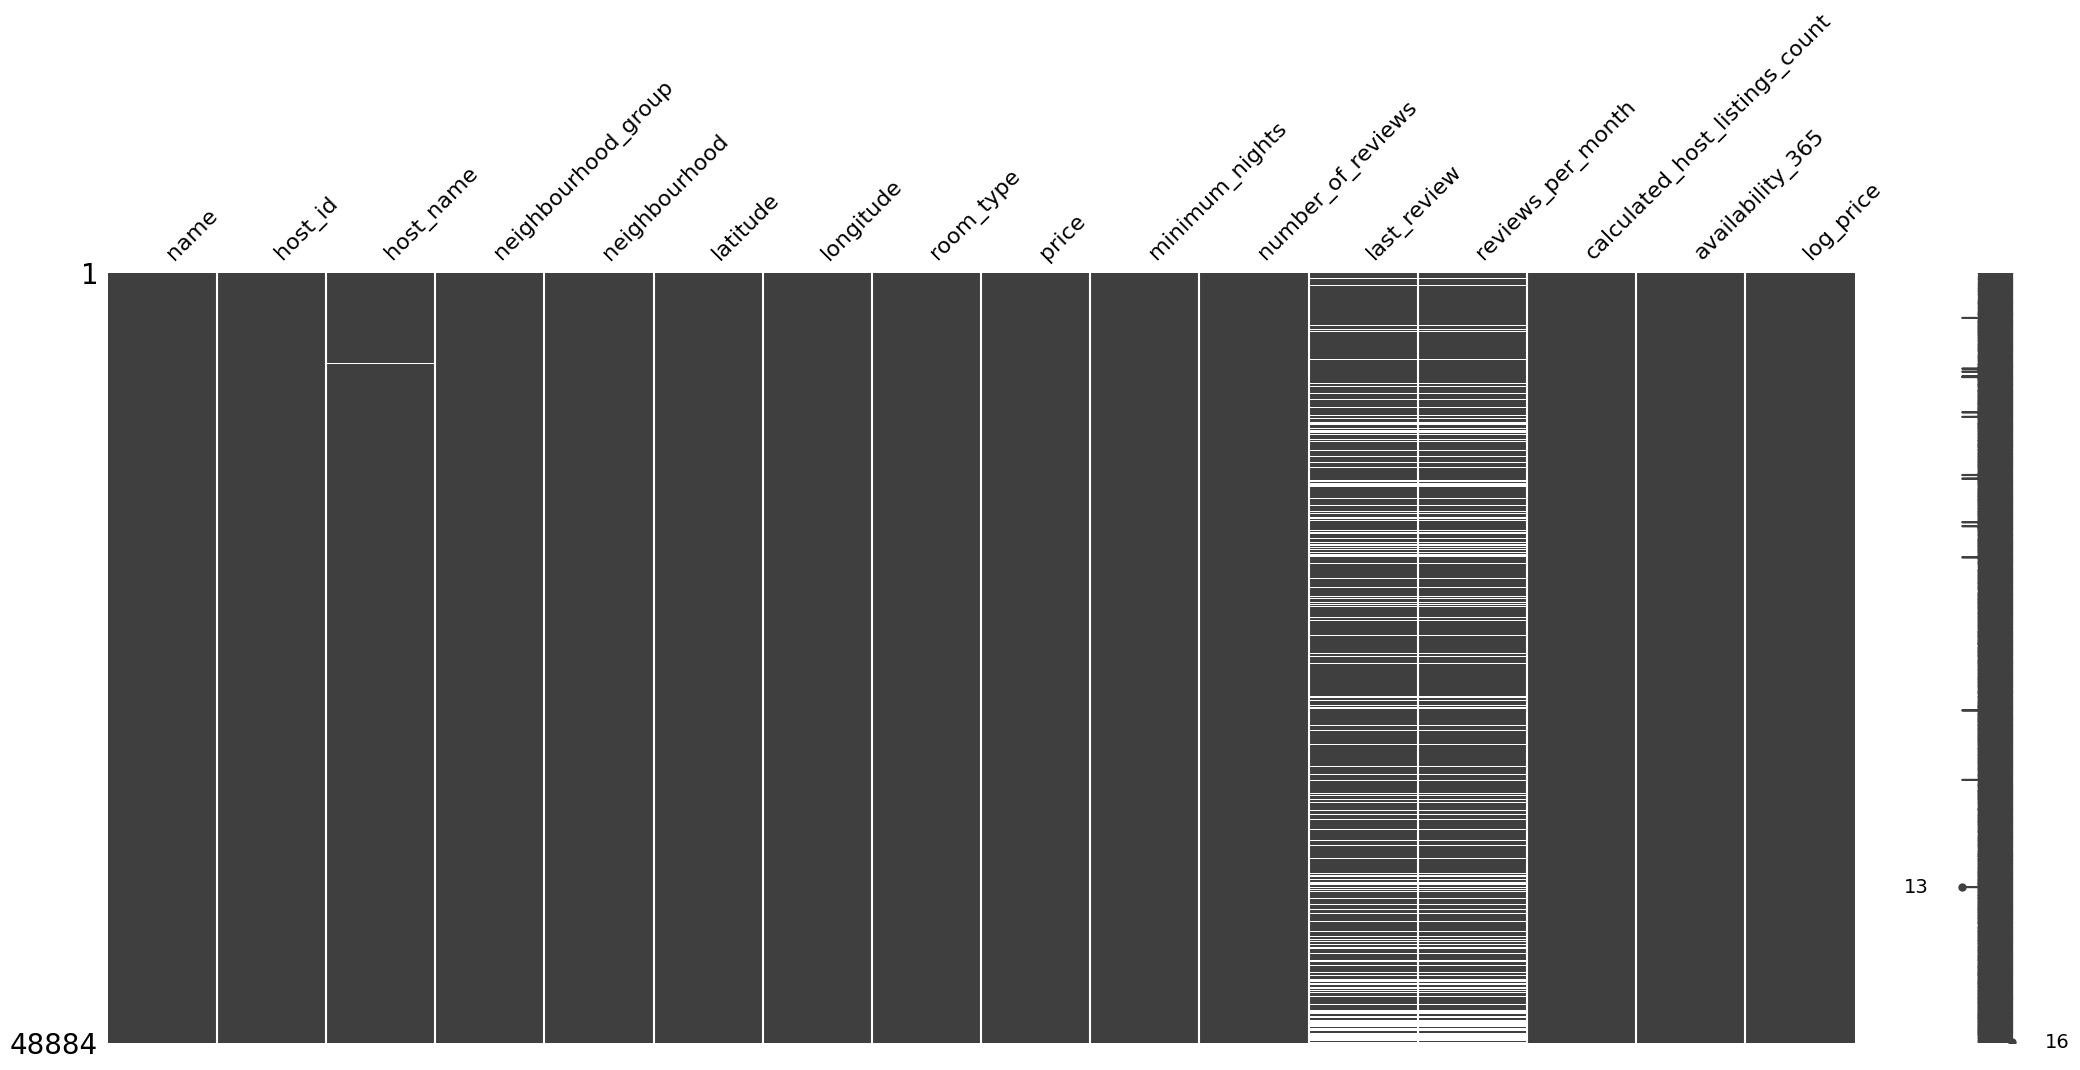

In [21]:
msno.matrix(df)

In [22]:
# Comprobamos el porcentaje de anuncios que presentan al menos un valor faltante
df.isnull().any(axis=1).mean()*100

np.float64(20.605924228786517)

In [23]:
# Eliminamos la columna reviews
df.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True)

tenemos ya el id del host por lo que el nombre nos da igual

In [26]:
# Eliminamos la columna host_name
df.drop(['host_name'], axis=1, inplace=True)

In [30]:
# Eliminamos la columna name del airbnb
df.drop(['name'], axis=1, inplace=True)

In [31]:
# Comprobamos el porcentaje de anuncios que presentan al menos un valor faltante
df.isnull().any(axis=1).mean()*100

np.float64(0.0)

In [ ]:
sorted_barrios = sorted(df['neighbourhood_group'].unique())
df['neighbourhood_group_num'] = 0;
sorted_barrios

for barrio in df['neighbourhood_group']:
    if barrio == 'Brooklyn':
        df['neighbourhood_group']


Brooklyn
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Brooklyn
Brooklyn
Manhattan
Brooklyn
Manhattan
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Manhattan
Manhattan
Brooklyn
Brooklyn
Manhattan
Manhattan
Brooklyn
Queens
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Manhattan
Brooklyn
Brooklyn
Manhattan
Brooklyn
Manhattan
Manhattan
Brooklyn
Manhattan
Brooklyn
Manhattan
Manhattan
Brooklyn
Brooklyn
Manhattan
Brooklyn
Manhattan
Brooklyn
Manhattan
Manhattan
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Manhattan
Queens
Brooklyn
Manhattan
Brooklyn
Manhattan
Manhattan
Brooklyn
Manhattan
Brooklyn
Brooklyn
Manhattan
Manhattan
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Brooklyn
Manhattan
Manhattan
Manhattan
Brooklyn
Manhattan
Brooklyn
Manhattan
Manhattan
Brooklyn
Brookly

## Categóricas a Numéricas:

In [34]:
# Imputamos los valores faltantes usando el algoritmo knn
imputador_knn = KNNImputer(n_neighbors=3)
df_imputado = pd.DataFrame(imputador_knn.fit_transform(df), columns=df.columns)

ValueError: could not convert string to float: 'Clean & quiet apt home by the park'